### Import Libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Import Dataset

In [16]:
df = pd.read_csv("Salary_Data.csv")

In [17]:
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


### Check for null values

In [18]:
print(df.isnull().values.any())
print(df.isnull().sum())

True
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


### Imputing

In [19]:
num_cols = ["Age","Years of Experience","Salary"]
cat_cols = ["Gender", "Education Level", "Job Title"]

imputer = SimpleImputer(strategy="mean")
df[num_cols] = imputer.fit_transform(df[num_cols])
imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [20]:
print(df.isnull().values.any())
print(df.isnull().sum())

False
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### Split Features from the Independent Variable

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

### Encoding Categorical Data

In [22]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [23]:
print(X)

       Age  Years of Experience  Gender_Male  Gender_Other  \
0     32.0                  5.0         True         False   
1     28.0                  3.0        False         False   
2     45.0                 15.0         True         False   
3     36.0                  7.0        False         False   
4     52.0                 20.0         True         False   
...    ...                  ...          ...           ...   
6699  49.0                 20.0        False         False   
6700  32.0                  3.0         True         False   
6701  30.0                  4.0        False         False   
6702  46.0                 14.0         True         False   
6703  26.0                  1.0        False         False   

      Education Level_Bachelor's Degree  Education Level_High School  \
0                                 False                        False   
1                                 False                        False   
2                                 False

### Splitting the Training Set and Test Set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [25]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Age  Years of Experience  Gender_Male  Gender_Other  \
4770  26.0                  2.0         True         False   
3644  29.0                  5.0        False         False   
1900  47.0                 16.0         True         False   
4634  27.0                  1.0        False         False   
2971  49.0                 22.0        False         False   
...    ...                  ...          ...           ...   
1259  54.0                 17.0         True         False   
5538  24.0                  0.0        False         False   
3264  26.0                  2.0         True         False   
399   29.0                  4.0         True         False   
2532  38.0                 13.0        False         False   

      Education Level_Bachelor's Degree  Education Level_High School  \
4770                              False                         True   
3644                              False                        False   
1900                              False

### Feature Scaling

In [26]:
scaler = StandardScaler()
columns_to_scale = ["Age", "Years of Experience"]
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [27]:
print(X_train)
print(X_test)

           Age  Years of Experience  Gender_Male  Gender_Other  \
4770 -1.003026            -1.009453         True         False   
3644 -0.608091            -0.512247        False         False   
1900  1.761518             1.310843         True         False   
4634 -0.871381            -1.175189        False         False   
2971  2.024808             2.305256        False         False   
...        ...                  ...          ...           ...   
1259  2.683033             1.476579         True         False   
5538 -1.266315            -1.340924        False         False   
3264 -1.003026            -1.009453         True         False   
399  -0.608091            -0.677982         True         False   
2532  0.576714             0.813637        False         False   

      Education Level_Bachelor's Degree  Education Level_High School  \
4770                              False                         True   
3644                              False                        

### Create the Model and Fit to Training Data

In [28]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Predict on the Test Data

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
print(y_pred)

[ 82480.25 134599.    37842.   ... 137007.   160882.5  138107.75]


In [31]:
print(y_test)

3506     80000.0
4776    125000.0
4539     42000.0
4262    168000.0
2884    110707.0
          ...   
2506    138032.0
2656    120000.0
952     197000.0
811     190000.0
657     185000.0
Name: Salary, Length: 1341, dtype: float64


### Change this to a better format

In [32]:
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

In [33]:
print(y_test_series)
print(y_pred_series)

3506     80000.0
4776    125000.0
4539     42000.0
4262    168000.0
2884    110707.0
          ...   
2506    138032.0
2656    120000.0
952     197000.0
811     190000.0
657     185000.0
Name: Salary, Length: 1341, dtype: float64
0        82480.25
1       134599.00
2        37842.00
3       194862.00
4       113250.50
          ...    
1336    158779.00
1337    109896.25
1338    137007.00
1339    160882.50
1340    138107.75
Length: 1341, dtype: float64


### Create a DataFrame for Comparison

In [34]:
comparison_df = pd.concat([y_test_series.reset_index(drop=True), y_pred_series], axis=1)
comparison_df.columns = ["Actual", "Predicted"]

print(comparison_df)

        Actual  Predicted
0      80000.0   82480.25
1     125000.0  134599.00
2      42000.0   37842.00
3     168000.0  194862.00
4     110707.0  113250.50
...        ...        ...
1336  138032.0  158779.00
1337  120000.0  109896.25
1338  197000.0  137007.00
1339  190000.0  160882.50
1340  185000.0  138107.75

[1341 rows x 2 columns]


### Evaluate the Model

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_series.values, y_pred_series.values)
rmse = np.sqrt(mean_squared_error(y_test_series.values, y_pred_series.values))
mae = mean_absolute_error(y_test_series.values, y_pred_series.values)
r2 = r2_score(y_test_series.values, y_pred_series.values)


In [36]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-Squared Score: ", r2)

Mean Squared Error:  8.232797599870436e+29
Root Mean Squared Error:  907347651116728.0
Mean Absolute Error:  69699095379249.42
R-Squared Score:  -2.977461888891339e+20


### Visualize Actual vs. Predicted

Text(0.5, 1.0, 'Actual vs. Predicted Values')

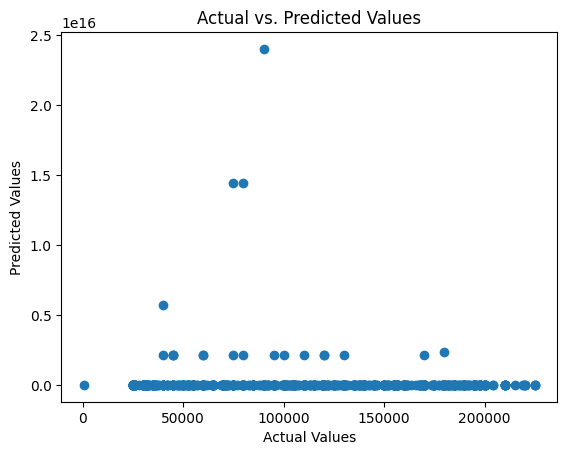

In [37]:
plt.scatter(y_test_series.values, y_pred_series.values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

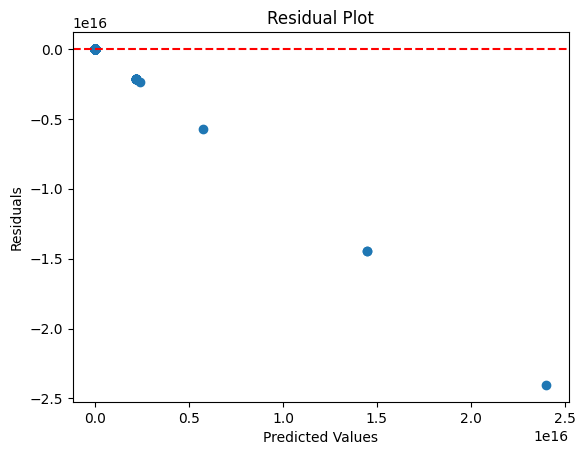

In [38]:

residuals = y_test_series.values - y_pred_series.values
plt.scatter(y_pred_series.values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()